In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/generaldatasets/SystemAdministrators.csv
/kaggle/input/generaldatasets/sim_test.csv
/kaggle/input/generaldatasets/np.csv
/kaggle/input/generaldatasets/flying.csv
/kaggle/input/generaldatasets/growth.csv
/kaggle/input/generaldatasets/protein.csv
/kaggle/input/generaldatasets/CIACountries.csv
/kaggle/input/generaldatasets/vehicles.csv
/kaggle/input/generaldatasets/marathon_results_2017.csv
/kaggle/input/generaldatasets/ACS.csv
/kaggle/input/generaldatasets/WorldCities.csv
/kaggle/input/generaldatasets/Cereals.csv
/kaggle/input/generaldatasets/light.csv
/kaggle/input/generaldatasets/BreadBasket.csv
/kaggle/input/generaldatasets/complete.csv
/kaggle/input/generaldatasets/drinks.csv
/kaggle/input/generaldatasets/allbacks.csv
/kaggle/input/generaldatasets/global-superstore.xlsx
/kaggle/input/generaldatasets/HollywoodMovies.csv
/kaggle/input/generaldatasets/poly_news.csv
/kaggle/input/generaldatasets/MiamiHeat.csv
/kaggle/input/generaldatasets/presidentialElections.csv
/kaggle/i

Part one: Quantitative or Numerical
=================
Name,mfr are Nominal and type are Ordinal while others are quantitative.

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/generaldatasets/Cereals.csv')
#print(df.to_string())
#print(df.loc[0])
print("Quantitation/Numerical/Nominal/Ordinal Variable are seen as below:")
print(df.info())
print("-----------------------")
print("Name,mfr are Nominal and type are Ordinal while others are quantitative.")

Quantitation/Numerical/Nominal/Ordinal Variable are seen as below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB
None
-----------------------
Name,mfr are Nominal and type are Ord

Part Two: Summary Statistics
=================

In [3]:
df = df.iloc[:,3:]
print("mean:\n",format(df.mean()), sep  ="")
print("-----------------------")
print("median:\n",format(df.median()), sep  ="")
print("-----------------------")
print("min:\n",format(df.min()), sep  ="")
print("-----------------------")
print("max:\n",format(df.max()), sep  ="")
print("-----------------------")
print("std:\n",format(df.std()), sep  ="")
print("-----------------------")

df_statistics = pd.DataFrame()
df_statistics["mean"] = df.mean()
df_statistics["median"] = df.median()
df_statistics["min"] = df.min()
df_statistics["max"] = df.max()
df_statistics["std"] = df.std()
print(df_statistics)

mean:
calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.802632
sugars        7.026316
potass       98.666667
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
rating       42.665705
dtype: float64
-----------------------
median:
calories    110.000000
protein       3.000000
fat           1.000000
sodium      180.000000
fiber         2.000000
carbo        14.500000
sugars        7.000000
potass       90.000000
vitamins     25.000000
shelf         2.000000
weight        1.000000
cups          0.750000
rating       40.400208
dtype: float64
-----------------------
min:
calories    50.000000
protein      1.000000
fat          0.000000
sodium       0.000000
fiber        0.000000
carbo        5.000000
sugars       0.000000
potass      15.000000
vitamins     0.000000
shelf        1.000000
weight       0.500000
cups         0.250000
rating      18.042851
dtype: float64
----

Part Three: Plot Histogram
=================

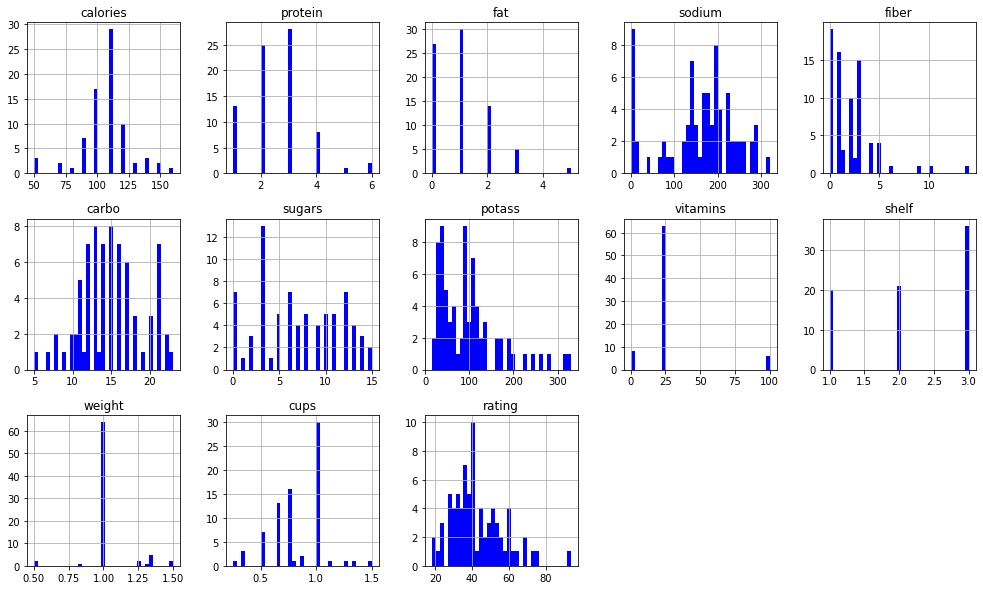

In [4]:
from matplotlib import pyplot as plt
df.hist(sharex=False, sharey=False, color='b', figsize= (17,10), layout=(3,5), bins=35)
plt.show()

***Q: Which variables have the largest variability?***  
A: Sodium, whose variance is the largest, can be seen from the chart.  
***Q: Which variables seem skewed?***  
A: The charts show that fat, sodium, fiber, sugars, potass, cups, rating seem skewed.  
***Q: Identify any values that seem extreme?***  
A: Vitamins, Shelf, Weight are bifurcated by different Cereal.  

Part Four: Use Boxplot
=================

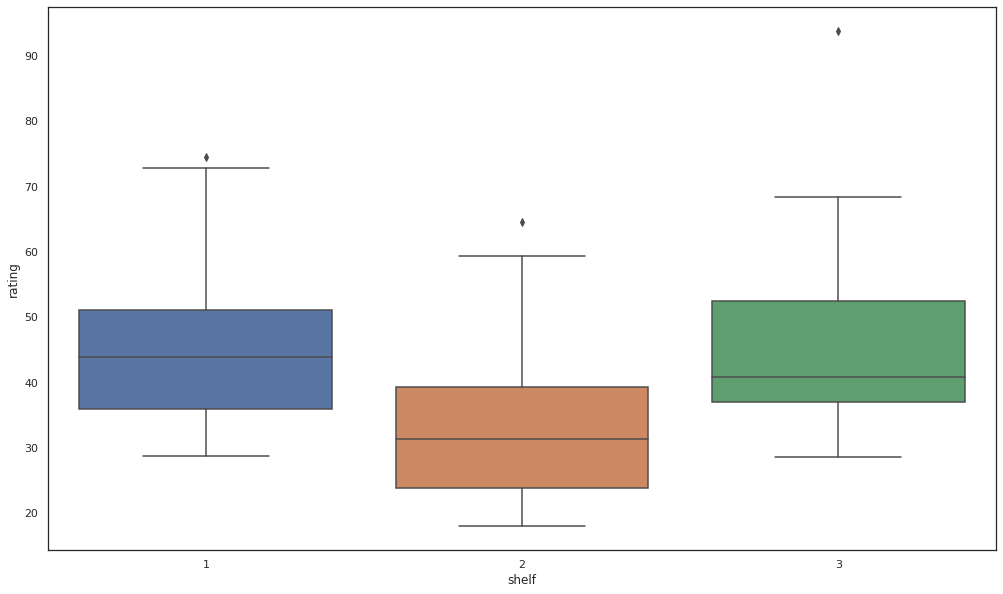

In [5]:
import seaborn as sns
sns.set_theme(style="white")
plt.figure(figsize=(17,10))
sns.boxplot(x=df["shelf"], y=df["rating"]);

***Q: Can you recommend some dimension reduction for the variables?***  
A: To reduce the dimension of the variables, I strongly recommend Principal Component Analysis (PCA) as it is the most widely used way for dimension reduction.  
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.  

Part Five: Correlation
=================

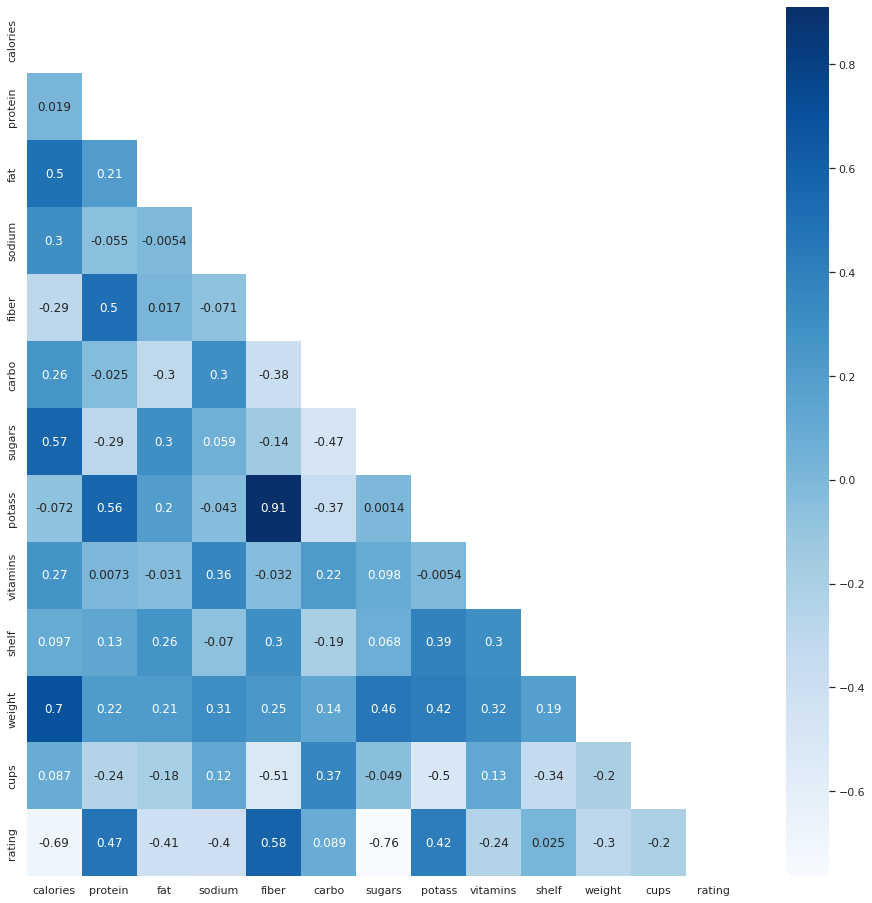

In [6]:
import numpy as np
plt.subplots(figsize=(16, 16))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap="Blues", annot=True)
plt.show()

***Q: Which pair of variables is the most strongly correlated?***  
A: Potass and fiber, since that their correlation is up to 0.91.  
***Q: How can we reduce the number of variables based on these correlations?***  
A: Simply remove the suspected outliers from the data or using PCA which was mentioned above.  
***Q: How would the corrections change if we normalize this data first?***  
A: Correlations are invariant to linear transformations of the data, so normalize the data will not chang the corrections at all.

Part Six: Principal Component Analysis (PCA) & Regression
=================

[2.77509011e-01 2.41794565e-01 1.40544478e-01 8.16823097e-02
 7.47590216e-02 5.52813987e-02 5.17152596e-02 3.44492222e-02
 2.33612854e-02 9.48011918e-03 5.60458921e-03 3.81865837e-03
 8.24525104e-08]


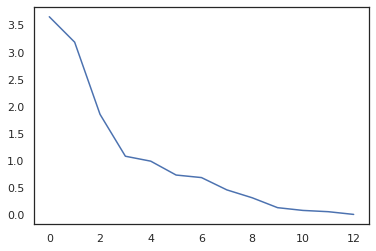

model intercept: 67.95902813596052
-----------------------
features coefficient: [-0.28882407  5.13159384 -4.16558286 -0.04065492  1.49916444]
-----------------------
model score: 0.8324925617887543
-----------------------


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

df = df.fillna(0) #Replace NULL values with the number 0
x = df.values
x = scale(x)
pca = PCA()
pca.fit(x)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_)
plt.show()

variable = ['calories', 'protein', 'fat', 'sodium', 'fiber']
x = df[variable]
y = df["rating"]
model = LinearRegression()
model.fit(x, y)

print("model intercept:",format(model.intercept_))
print("-----------------------")
print("features coefficient:",format(model.coef_))
print("-----------------------")
print("model score:",format(model.score(x, y)))
print("-----------------------")

In [8]:
import statsmodels.api as sm
mlr = sm.OLS(y, x).fit()
print("statsmodels results:",format(mlr.summary()))

statsmodels results:                                  OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              207.7
Date:                Sat, 02 Jul 2022   Prob (F-statistic):                    2.62e-41
Time:                        02:44:37   Log-Likelihood:                         -296.86
No. Observations:                  77   AIC:                                      603.7
Df Residuals:                      72   BIC:                                      615.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------